First we have entered the url from where the file can be loaded

In [66]:
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

Then imported Pandas 

In [67]:
import pandas as pd


Using Pandas, read the csv file from the url. Data is a panas Dataframe.

In [68]:
data=pd.read_csv(url)

To view what's inside the dataframe

In [69]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


For data visualization let's import Seaborn

In [70]:
import seaborn as sns

Drawing an lmplot using seaborn module taking data Dataframe as data to view the relation between the values of 'Hours' and 'Scores' column

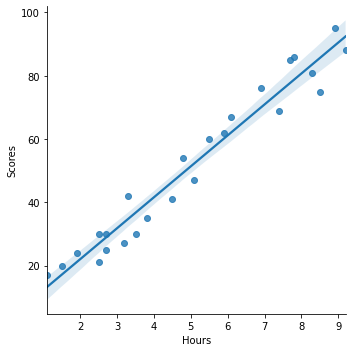

In [71]:
sns.lmplot(x='Hours',y='Scores',data=data)

Import numpy

In [72]:
import numpy as np

Let's now begin to train out regression model! We will need to first split up our data into an x array that contains the features to train on, and a y array with the target variable. Here the target is the 'Scores' column

In [73]:
x= data.iloc[:, :-1].values 
y=data['Scores'].values

In [74]:
print(x)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

Creating and training the model

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
data_lr = LinearRegression()

In [79]:
data_lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [80]:
print(data_lr.intercept_)

1.4459923890285964


In [81]:
coeff=data_lr.coef_  

In [82]:
print(coeff)

[10.12298698]


Holding all other features fixed, a 1 unit increase in Area Population is associated with an *increase of 10.122 scores*

Let's predict our model

In [83]:
predictions = data_lr.predict(X_test)

In [84]:
print(predictions)

[26.75345983 79.39299211 39.9133429  76.35609602 57.12242076 50.03632988
 33.83955072 87.49138169 53.07322597 12.58127806]


In [85]:
import matplotlib.pyplot as plt


Plotting the predictions

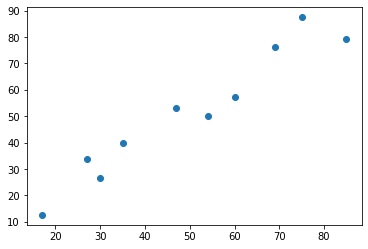

In [86]:
plt.scatter(y_test,predictions)

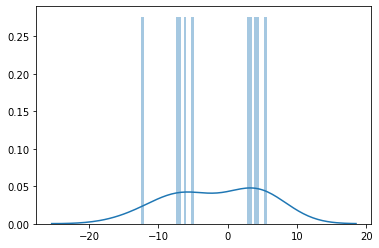

In [87]:
sns.distplot((y_test-predictions),bins=50)

In [88]:
from sklearn import metrics

Regression evaluation metrics

In [89]:
print('mean_absolute error:', metrics.mean_absolute_error(y_test, predictions))
print('mean_squared_error:', metrics.mean_squared_error(y_test, predictions))
print('root_mean_squared_error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

mean_absolute error: 5.778711665327945
mean_squared_error: 40.3446038605835
root_mean_squared_error: 6.351740223008455


Let's make a dataframe of the predicted values and the test data to compare

In [90]:

df = pd.DataFrame({'Test_data': y_test, 'Predicted_value': predictions}) 

In [91]:
df.head()

,Test_data,Predicted_value
0,30,26.753460
1,85,79.392992
2,35,39.913343
3,69,76.356096
4,60,57.122421


In [92]:
my_hour=9.25
my_hour=np.array(my_hour).reshape(-1,1)

In [93]:
my_own_prediction=data_lr.predict(my_hour)

In [94]:
print(my_own_prediction)

[95.08362193]


The predicted score is 95.083